## EDA: Portuguese Higher and Secondary Education

This notebook explores the shapes, trends, and relationships of the data present in the modelling tables created from the datasets.

### Imports and reading datasets

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../scripts'))
import maps as mp
import matplotlib.pyplot as plt
import pandas as pd

lower_model_df = pd.read_csv("../../data/results/lower_ed_scored.csv")
higher_model_df = pd.read_csv("../../data/results/higher_ed_scored.csv")

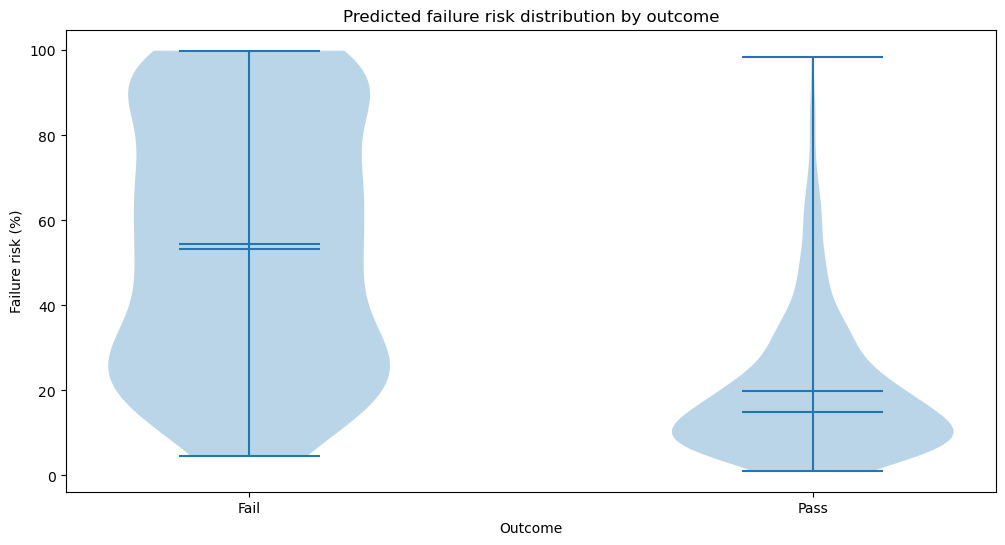

In [2]:
# Split data 
fail_df = lower_model_df.loc[lower_model_df["target"] == "fail", "fail_risk"]
pass_df = lower_model_df.loc[lower_model_df["target"] == "pass", "fail_risk"]

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Violin plot
ax.violinplot(
    [fail_df, pass_df],
    showmeans=True,
    showmedians=True,
)

# Set x-ticks and labels
ax.set_xticks([1, 2])
ax.set_xticklabels(["Fail", "Pass"])

ax.set_xlabel("Outcome")
ax.set_ylabel("Failure risk (%)")
ax.set_title("Predicted failure risk distribution by outcome")

plt.show()

In [3]:
# Combine datasets with labels
lower_model_df["education_level"] = "lower"
higher_model_df["education_level"] = "higher"

combined_df = pd.concat([lower_model_df, higher_model_df])

# Label family relationship quality for readability
famrel_labels = {
    1: "Terrible",
    2: "Bad",
    3: "Average",
    4: "Good",
    5: "Excellent"
}

combined_df["famrel_label"] = combined_df["famrel"].map(famrel_labels)


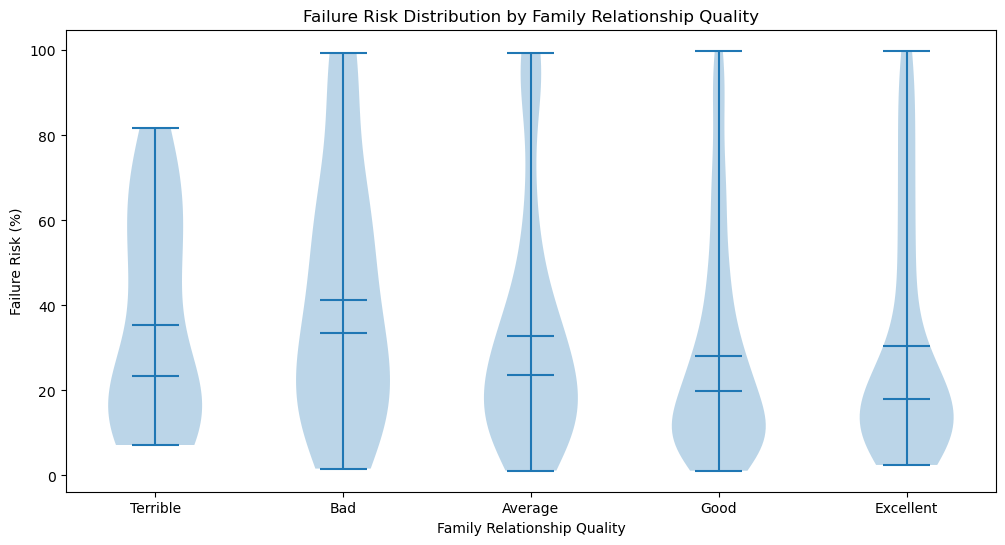

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

# Sorted family groups
groups = sorted(combined_df["famrel"].dropna().unique())

dataplot = [combined_df.loc[combined_df["famrel"] == g, "fail_risk"] for g in groups]

ax.violinplot(
    dataplot,
    showmeans=True,
    showmedians=True,
)

ax.set_xticks(range(1, len(groups) + 1))
ax.set_xticklabels([famrel_labels.get(g, str(g)) for g in groups])

ax.set_xlabel("Family Relationship Quality")
ax.set_ylabel("Failure Risk (%)")
ax.set_title("Failure Risk Distribution by Family Relationship Quality")

plt.show()

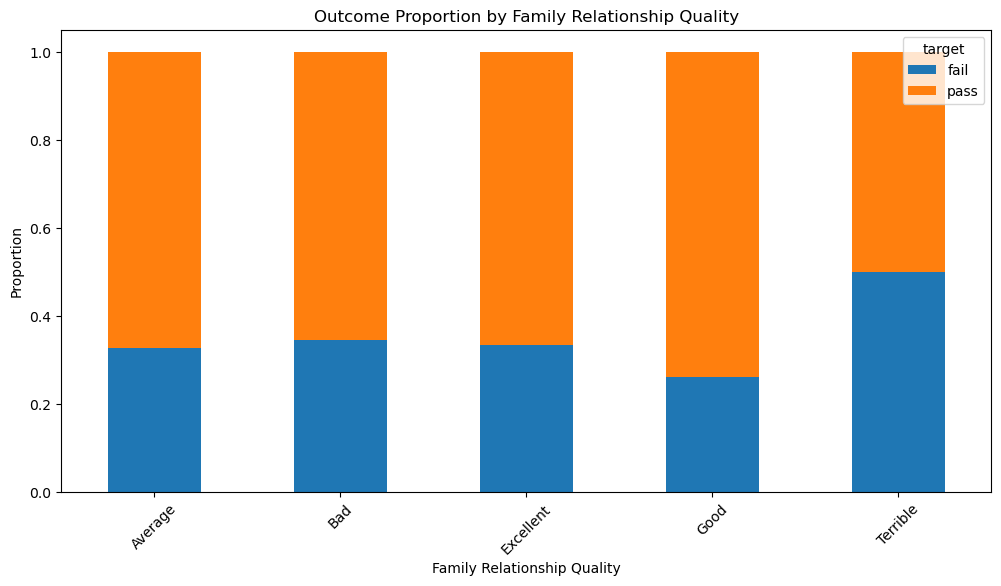

In [5]:
# Calculate counts
outcome_counts = (
    combined_df
    .groupby(["famrel_label", "target"])
    .size()
    .unstack(fill_value=0)
)

# Calculate proportions
outcome_prop = outcome_counts.div(outcome_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12, 6))

outcome_prop.plot(
    kind="bar",
    stacked=True,
    ax=ax
)

ax.set_xlabel("Family Relationship Quality")
ax.set_ylabel("Proportion")
ax.set_title("Outcome Proportion by Family Relationship Quality")

plt.xticks(rotation=45)
plt.show()


In [6]:
# Create activity label
lower_model_df["activities_label"] = lower_model_df["activities"].map({
    "yes": "Participates",
    "no": "Doesn't Participate"
})


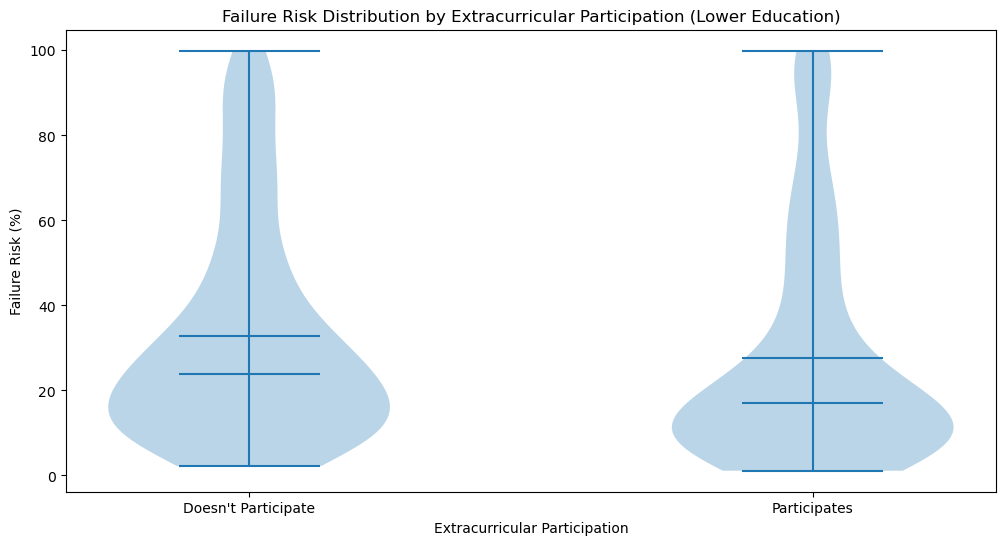

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

groups = lower_model_df["activities_label"].dropna().unique()

dataplot2 = [lower_model_df.loc[lower_model_df["activities_label"] == g, "fail_risk"] for g in groups]

ax.violinplot(
    dataplot2,
    showmeans=True,
    showmedians=True,
)

ax.set_xticks(range(1, len(groups) + 1))
ax.set_xticklabels(groups)

ax.set_xlabel("Extracurricular Participation")
ax.set_ylabel("Failure Risk (%)")
ax.set_title("Failure Risk Distribution by Extracurricular Participation (Lower Education)")

plt.show()


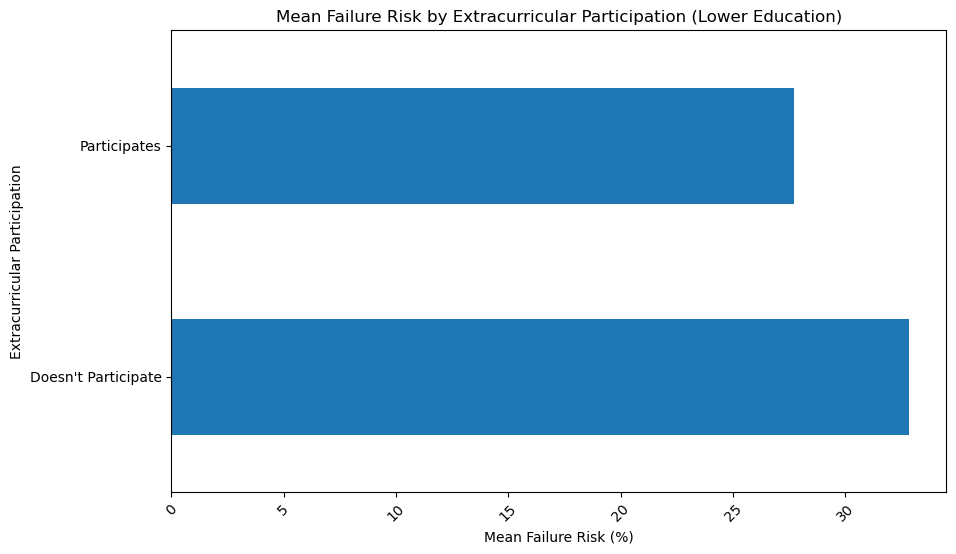

In [8]:
mean_risk = (lower_model_df.groupby("activities_label")["fail_risk"].mean())

fig, ax = plt.subplots(figsize=(10, 6))

mean_risk.plot(kind="barh", ax=ax)

ax.set_xlabel("Mean Failure Risk (%)")
ax.set_ylabel("Extracurricular Participation")
ax.set_title("Mean Failure Risk by Extracurricular Participation (Lower Education)")

plt.xticks(rotation=45)
plt.show()


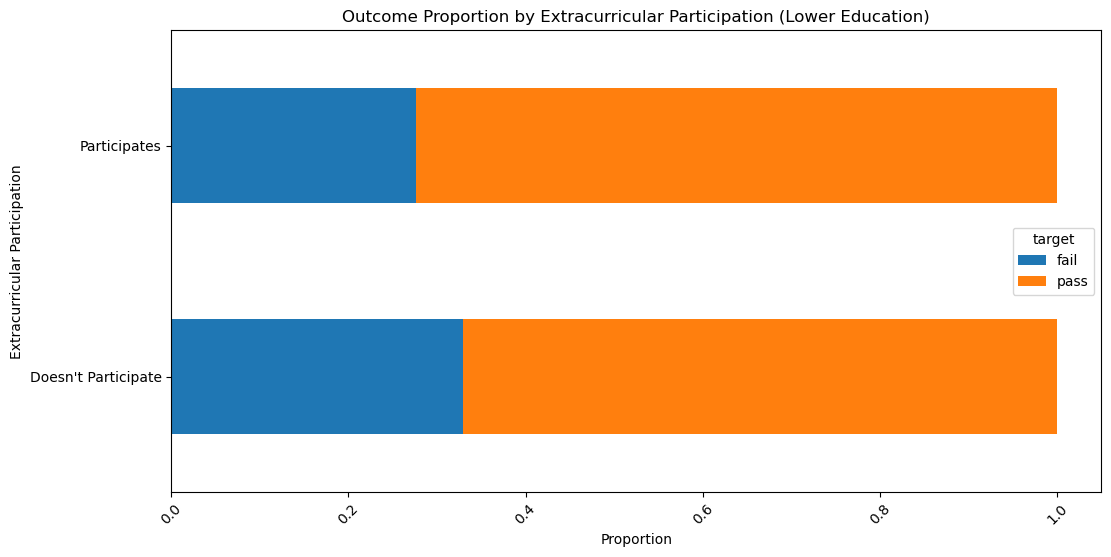

In [9]:
outcome_counts = (lower_model_df.groupby(["activities_label", "target"]).size().unstack(fill_value=0))

outcome_prop = outcome_counts.div(outcome_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12, 6))

outcome_prop.plot(
    kind="barh",
    stacked=True,
    ax=ax
)

ax.set_xlabel("Proportion")
ax.set_ylabel("Extracurricular Participation")
ax.set_title("Outcome Proportion by Extracurricular Participation (Lower Education)")

plt.xticks(rotation=45)
plt.show()
